In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_train = pd.read_csv("Flight Prices/Data_Train.csv")
df_test = pd.read_csv("Flight Prices/Test_set.csv")

In [3]:
df_train

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

In [4]:
df_train = df_train.drop(["Date_of_Journey","Route","Dep_Time","Arrival_Time"], axis=1)
df_test = df_test.drop(["Date_of_Journey","Route","Dep_Time","Arrival_Time"], axis=1)

In [5]:
df_train.Total_Stops[df_train.Total_Stops == "1 stop"] = 1
df_train.Total_Stops[df_train.Total_Stops == "2 stops"] = 2
df_train.Total_Stops[df_train.Total_Stops == "3 stops"] = 3
df_train.Total_Stops[df_train.Total_Stops == "4 stops"] = 4
df_train.Total_Stops[df_train.Total_Stops == "non-stop"] = 0

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2345100018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.Total_Stops[df_train.Total_Stops == "1 stop"] = 1
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2345100018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.Total_Stops[df_train.Total_Stops == "2 stops"] = 2
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2345100018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [6]:
for i in range(len(df_train.Duration)):
    hour = df_train["Duration"][i].split("h")
    minute = hour[1].split("m") if len(hour) > 1 else hour[0].split("m")
    final_min = int(hour[0] if len(hour) > 1 else 0) * 60 + int(minute[0] if len(minute) > 1 else 0)
    df_train["Duration"][i] = int(final_min)
#     df_train.Duration[df_train.Duration == i] = final_min

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][i] = int(final_min)
C:\Users\swast\AppData\Local\Temp\ipykernel_3472\2773368894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Duration"][

In [7]:
df_train = pd.get_dummies(df_train, columns=["Airline","Source","Destination","Additional_Info"], dtype=int)

In [8]:
df_train = df_train.dropna()

In [9]:
X = df_train.drop(["Price"], axis=1)
y = pd.DataFrame(df_train["Price"])

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [11]:
lr = LinearRegression()
dr = DecisionTreeRegressor()
rr = RandomForestRegressor()

In [12]:
lr.fit(X, y)

LinearRegression()

In [13]:
lr.score(X, y)

0.6718539144007615

In [14]:
dr.fit(X, y)

DecisionTreeRegressor()

In [15]:
dr.score(X, y)

0.831218963433444

In [16]:
rr.fit(X, y)

C:\Users\swast\AppData\Local\Temp\ipykernel_3472\3068493584.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rr.fit(X, y)


RandomForestRegressor()

In [17]:
rr.score(X, y)

0.8254240671065338

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
mean_absolute_error(y, lr.predict(X))

1776.922668918747

In [20]:
mean_absolute_error(y, dr.predict(X))

1080.6094757877688

In [21]:
mean_absolute_error(y, rr.predict(X))

1131.0478828183775

In [22]:
y.shape

(10682, 1)

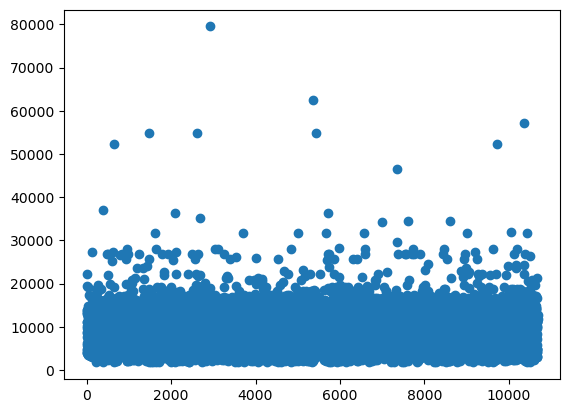

In [23]:
plt.scatter(range(10682), y)

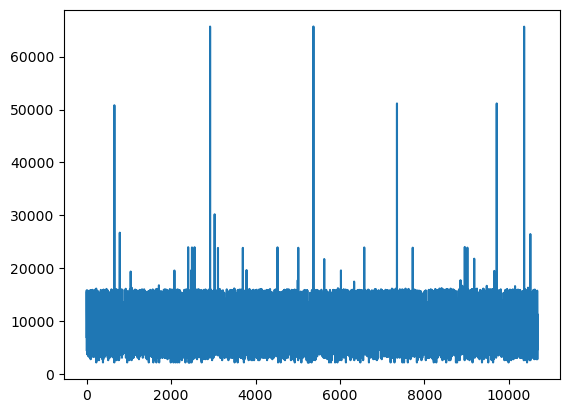

In [24]:
plt.plot(range(10682), lr.predict(X))